Priority Scheduling (Non-Preemptive)
Process	Priority	Burst Time	Waiting Time	Turnaround Time
P2	   1		   5		     0		      5
P4	   2		   6		     5		      11
P1	   3		   10		     11		      21
P3	   4		   8		     21		      29

Gantt Chart:
|  P2  |  P4  |  P1  |  P3  |
0   5   11   21   29 

Waiting Time vs Turnaround Time
--------------------------------
Process	Waiting Time	Turnaround Time
P2	    0		      5
P4	    5		      11
P1	    11		      21
P3	    21		      29


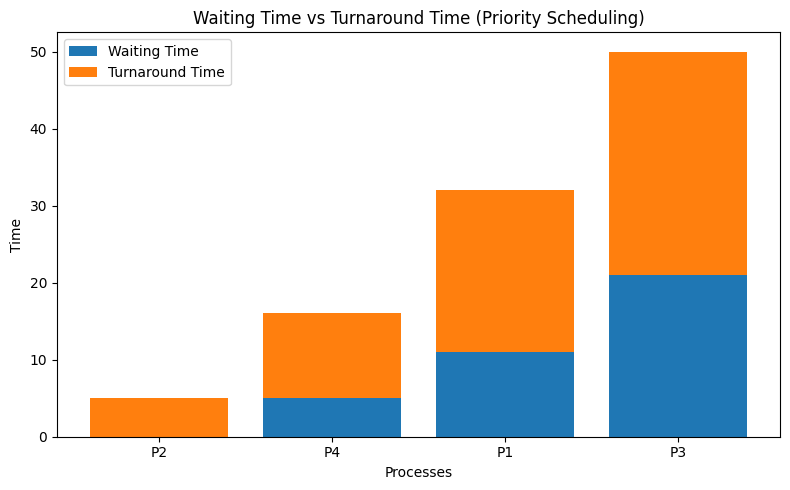

In [2]:
import matplotlib.pyplot as plt

# Priority Scheduling (Non-Preemptive)
def priority_scheduling(processes, burst_time, priority):
    n = len(processes)

    # Combine data for easy sorting
    process_data = list(zip(processes, burst_time, priority))

    # Sort by priority (lower number = higher priority)
    process_data.sort(key=lambda x: x[2])

    waiting_time = [0] * n
    turnaround_time = [0] * n

    # Calculate waiting time
    for i in range(1, n):
        waiting_time[i] = waiting_time[i - 1] + process_data[i - 1][1]

    # Calculate turnaround time
    for i in range(n):
        turnaround_time[i] = waiting_time[i] + process_data[i][1]

    # Print scheduling table
    print("Priority Scheduling (Non-Preemptive)")
    print("Process\tPriority\tBurst Time\tWaiting Time\tTurnaround Time")
    for i in range(n):
        p, bt, pr = process_data[i]
        print(f"{p}\t   {pr}\t\t   {bt}\t\t     {waiting_time[i]}\t\t      {turnaround_time[i]}")

    # Gantt chart
    print("\nGantt Chart:")
    for p, _, _ in process_data:
        print(f"|  {p}  ", end="")
    print("|")

    # Time line of Gantt chart
    time = 0
    print("0", end=" ")
    for _, bt, _ in process_data:
        time += bt
        print(f"  {time}", end=" ")
    print("\n")

    print("Waiting Time vs Turnaround Time")
    print("--------------------------------")
    print("Process\tWaiting Time\tTurnaround Time")
    for i in range(n):
        p, bt, pr = process_data[i]
        print(f"{p}\t    {waiting_time[i]}\t\t      {turnaround_time[i]}")

    return process_data, waiting_time, turnaround_time


# Example Input
processes = ["P1", "P2", "P3", "P4"]
burst_time = [10, 5, 8, 6]
priority = [3, 1, 4, 2]

# Run scheduling
process_data, waiting_time, turnaround_time = priority_scheduling(processes, burst_time, priority)

# Extract sorted process names
sorted_processes = [p[0] for p in process_data]

# ---------------- GRAPH ---------------- #

plt.figure(figsize=(8,5))
plt.bar(sorted_processes, waiting_time, label="Waiting Time")
plt.bar(sorted_processes, turnaround_time, bottom=waiting_time, label="Turnaround Time")

plt.xlabel("Processes")
plt.ylabel("Time")
plt.title("Waiting Time vs Turnaround Time (Priority Scheduling)")
plt.legend()
plt.tight_layout()
plt.show()
